# 기초적인 통계를 앞서
----

* <b>순열</b>: 서로 다른 𝑛개에서 𝑟개를 중복 없이 뽑아 특정한 순서로 나열하는 것을 의미한다.
* <b>조합</b>: 서로 다른 𝑛개에서 𝑟개를 중복 없이 순서를 고려하지 않고 뽑는 것을 의미한다.
* <b>중복 순열</b>: 서로 다른 𝑛개에서 중복을 포함해 𝑟개를 뽑아 특정한 순서로 나열하는 것을 의미한다.
* <b>중복 조합</b>: 서로 다른 𝑛개에서 중복을 포함해 순서를 고려하지 않고 𝑟개를 뽑는 것을 의미한다.

In [5]:
from itertools import permutations

arr = ['A','B','C']

result = list(permutations(arr,2))
# A,B,C 중에서 2개를 뽑는 모든 조합 계산 
print(result)
print(result.__len__())

[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
6


조합을 골라보자. 아래와 같이 코드를 치다보면 함수에 대한 설명과 예제가 뜰것이다. 나중에 우리는 argparse라는 것을 이용해서, 우리가 만든 함수의 설명도 달아줄 것이다. 

![png](../src/combination_func.png)

In [7]:
from itertools import combinations

arr = ['A','B','C']

result = list(combinations(arr,2))
print(result)
print(result.__len__())

[('A', 'B'), ('A', 'C'), ('B', 'C')]
3


In [8]:
# 중복 순열 계산

from itertools import product

arr = ['A', 'B', 'C']
result = list(product(arr, repeat=2))
print(result)
print(result.__len__())

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]
9


In [9]:
# 중복 조합 계산 하기 

from itertools import combinations_with_replacement

arr = ['A', 'B', 'C']
result = list(combinations_with_replacement(arr, 2))
print(result)
print(result.__len__())

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'B'), ('B', 'C'), ('C', 'C')]
6


#### <b>이항 분포 시뮬레이션</b>

* 독립된 사건을 𝑁번 반복 시행했을 때, 특정 사건이 𝑥회 발생할 확률을 계산한다. 
  * 성공 확률이 𝜇인 베르누이 시행을 𝑁번 반복한다.

아래와 같이 시뮬레이션을 돌릴 수도 있고 scipy에서 정의된 함수를 쓸 수 있다. 

In [1]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


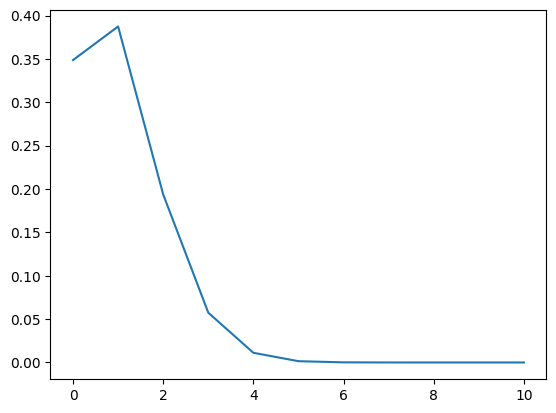

In [2]:
# PDF (Probability Density Function)
def pdf(x, n, mu):
    combinations = factorial(n) / (factorial(x) * factorial(n - x))
    return combinations * (mu ** x) * ((1 - mu) ** (n - x))


n = 10
mu = 0.1
X = [x for x in range(n + 1)]
prob = [pdf(x, n, mu) for x in X]

plt.plot(X, prob)
plt.show()

* 가구 공장에서 가구를 만들 때, <b>불량률이 10%</b>라고 한다.
* 이 공장에서 만든 가구 10개를 확인했을 때, <b>불량품이 2개 이하로 나올 확률</b>을 구하여라.

In [3]:
n = 10
mu = 0.1
X = [x for x in range(n + 1)]

for x in X:
    print(f"f({x}) = {pdf(x, n, mu) * 100.:.2f}%")


f(0) = 34.87%
f(1) = 38.74%
f(2) = 19.37%
f(3) = 5.74%
f(4) = 1.12%
f(5) = 0.15%
f(6) = 0.01%
f(7) = 0.00%
f(8) = 0.00%
f(9) = 0.00%
f(10) = 0.00%


In [4]:
x0 = pdf(0, 10, 0.1)
x1 = pdf(1, 10, 0.1)
x2 = pdf(2, 10, 0.1)

print(f"가구 10개를 확인했을 때, 불량품이 0개일 확률 = {x0 * 100.:.2f}%")
print(f"가구 10개를 확인했을 때, 불량품이 1개일 확률 = {x1 * 100.:.2f}%")
print(f"가구 10개를 확인했을 때, 불량품이 2개일 확률 = {x2 * 100.:.2f}%")
print(f"가구 10개를 확인했을 때, 불량품이 2개이하일 확률 = {(x0 + x1 + x2) * 100.:.2f}%")

가구 10개를 확인했을 때, 불량품이 0개일 확률 = 34.87%
가구 10개를 확인했을 때, 불량품이 1개일 확률 = 38.74%
가구 10개를 확인했을 때, 불량품이 2개일 확률 = 19.37%
가구 10개를 확인했을 때, 불량품이 2개이하일 확률 = 92.98%


## 다들 이해하고 있는 정도의 평균 분산 그리고 표준편차
---

평균과 분산 표준편차를 구해보자

In [5]:
import math

arr = [56, 93, 88, 72, 65]

# 평균(mean) 계산
mean = 0
for x in arr:
    mean += x / len(arr)

# 분산(variance) 계산
variance = 0
for x in arr:
    variance += ((x - mean) ** 2) / len(arr)

# 표준 편차(standard deviation) 계산
std = math.sqrt(variance)

print(f"평균: {mean:.2f}")
print(f"분산: {variance:.2f}")
print(f"표준 편차: {std:.2f}")

평균: 74.80
분산: 192.56
표준 편차: 13.88
